In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("pastel")
sns.set_theme(style="darkgrid")

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/datasets/fertilizer_dataset.csv")

In [ ]:
dataset.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [ ]:
dataset.tail()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP
98,29,58,57,Black,Sugarcane,12,0,10,20-20


In [ ]:
dataset.shape

(99, 9)

In [ ]:
dataset.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [ ]:
dataset.isnull().sum()

,0
Temparature,0
Humidity,0
Moisture,0
Soil Type,0
Crop Type,0
Nitrogen,0
Potassium,0
Phosphorous,0
Fertilizer Name,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [ ]:
dataset.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [ ]:
dataset.duplicated().sum()

np.int64(0)

In [ ]:
dataset.dtypes

,0
Temparature,int64
Humidity,int64
Moisture,int64
Soil Type,object
Crop Type,object
Nitrogen,int64
Potassium,int64
Phosphorous,int64
Fertilizer Name,object


In [ ]:
corr = dataset.select_dtypes(include=['number']).corr()
corr

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
Temparature,1.000000,0.973164,0.091222,-0.033771,-0.023424,0.207545
Humidity,0.973164,1.000000,0.091342,-0.060646,-0.003833,0.204044
Moisture,0.091222,0.091342,1.000000,-0.095945,0.027727,0.009276
Nitrogen,-0.033771,-0.060646,-0.095945,1.000000,-0.500087,-0.686971
Potassium,-0.023424,-0.003833,0.027727,-0.500087,1.000000,0.089192
Phosphorous,0.207545,0.204044,0.009276,-0.686971,0.089192,1.000000


<Axes: >

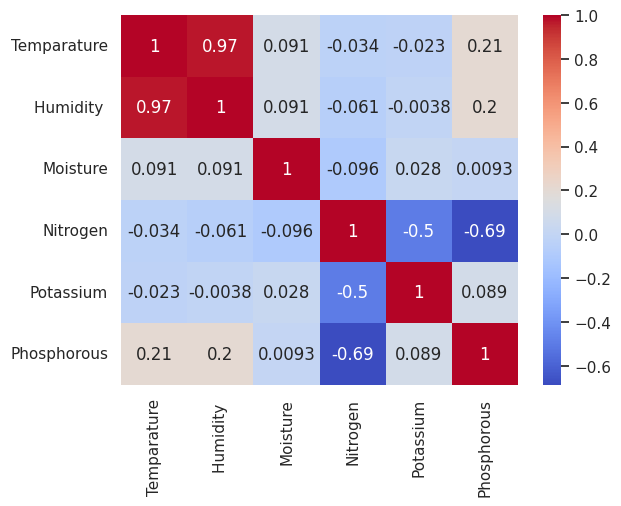

In [ ]:
import seaborn as sns
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [ ]:
dataset['Fertilizer Name'].value_counts().sum()

np.int64(99)

In [ ]:
dataset.nunique()

,0
Temparature,14
Humidity,13
Moisture,41
Soil Type,5
Crop Type,11
Nitrogen,24
Potassium,13
Phosphorous,32
Fertilizer Name,7


In [ ]:
dataset.apply(pd.unique).to_frame(name="Unique Values")

,Unique Values
Temparature,"[26, 29, 34, 32, 28, 25, 33, 30, 27, 31, 35, 3..."
Humidity,"[52, 65, 62, 54, 50, 64, 60, 58, 68, 70, 67, 5..."
Moisture,"[38, 45, 62, 34, 46, 35, 64, 50, 42, 33, 28, 4..."
Soil Type,"[Sandy, Loamy, Black, Red, Clayey]"
Crop Type,"[Maize, Sugarcane, Cotton, Tobacco, Paddy, Bar..."
Nitrogen,"[37, 12, 7, 22, 35, 9, 41, 21, 13, 14, 36, 24,..."
Potassium,"[0, 9, 10, 7, 15, 13, 14, 8, 12, 18, 19, 16, 17]"
Phosphorous,"[0, 36, 30, 20, 13, 10, 18, 40, 12, 22, 41, 14..."
Fertilizer Name,"[Urea, DAP, 14-35-14, 28-28, 17-17-17, 20-20, ..."


<Axes: xlabel='Fertilizer Name', ylabel='count'>

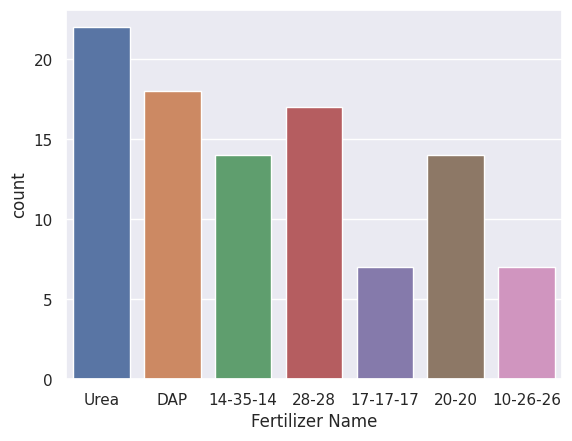

In [ ]:
sns.countplot(x='Fertilizer Name',data=dataset, palette='deep')

In [ ]:
dataset['Soil Type'].value_counts()

,count
Soil Type,
Loamy,21
Sandy,20
Clayey,20
Black,19
Red,19


In [ ]:
dataset['Crop Type'].value_counts()

,count
Crop Type,
Sugarcane,13
Cotton,12
Millets,11
Pulses,10
Paddy,10
Wheat,9
Barley,7
Oil seeds,7
Tobacco,7


In [ ]:
soil_dict={
    'Loamy':1,
    'Sandy':2,
    'Clayey':3,
    'Black':4,
    'Red':5
}

crop_dict={
    'Sugarcane':1,
    'Cotton':2,
    'Millets':3,
    'Paddy':4,
    'Pulses':5,
    'Wheat':6,
    'Tobacco':7,
    'Barley':8,
    'Oil seeds':9,
    'Ground Nuts':10,
    'Maize':11

}

In [ ]:
dataset['Soil_Num']=dataset['Soil Type'].map(soil_dict)
dataset['Crop_Num']=dataset['Crop Type'].map(crop_dict)

In [ ]:
dataset['Soil_Num'] = dataset['Soil Type'].map(soil_dict)

In [ ]:
dataset.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name,Soil_Num,Crop_Num
0,26,52,38,Sandy,Maize,37,0,0,Urea,2,11
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP,1,1
2,34,65,62,Black,Cotton,7,9,30,14-35-14,4,2
3,32,62,34,Red,Tobacco,22,0,20,28-28,5,7
4,28,54,46,Clayey,Paddy,35,0,0,Urea,3,4


In [ ]:
dataset=dataset.drop(['Soil Type','Crop Type'],axis=1)
dataset.head()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Fertilizer Name,Soil_Num,Crop_Num
0,26,52,38,37,0,0,Urea,2,11
1,29,52,45,12,0,36,DAP,1,1
2,34,65,62,7,9,30,14-35-14,4,2
3,32,62,34,22,0,20,28-28,5,7
4,28,54,46,35,0,0,Urea,3,4


In [ ]:
X=dataset.drop(['Fertilizer Name'],axis=1)
y=dataset['Fertilizer Name']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state = 42)

In [ ]:
print(f'Training data shape: {X_train.shape}')
print(f'Testing data shape: {X_test.shape}')

Training data shape: (79, 8)
Testing data shape: (20, 8)


In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
accuracy = log_reg.score(X_test, y_test)
accuracy

1.0

In [ ]:
y = dataset['Fertilizer Name'].copy()
X = dataset.drop('Fertilizer Name', axis=1).copy()

In [ ]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3,4])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

### Random Forest Classifier

Accuracy: 95.00%


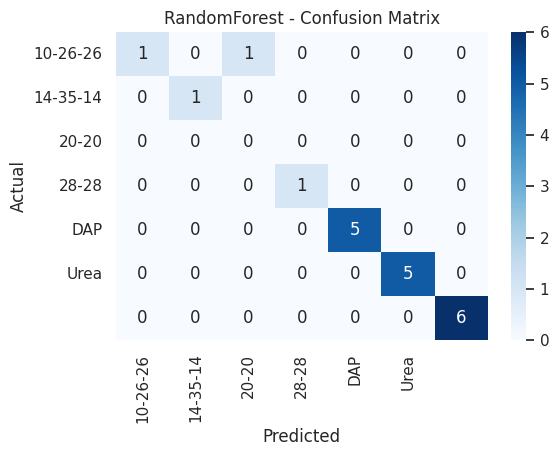

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

cm = confusion_matrix(y_test, y_pred)

labels = sorted(set(y_test))

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("RandomForest - Confusion Matrix")
plt.show()

### Decision Tree Classifier

Accuracy: 100.00%


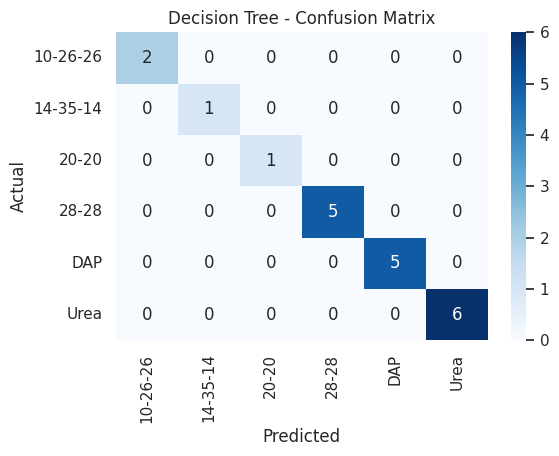

In [ ]:
dt_classifier = DecisionTreeClassifier(random_state=42)

dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")
cm = confusion_matrix(y_test, y_pred)

labels = sorted(set(y_test))

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree - Confusion Matrix")
plt.show()

### KNN Classifier

Accuracy: 85.00%


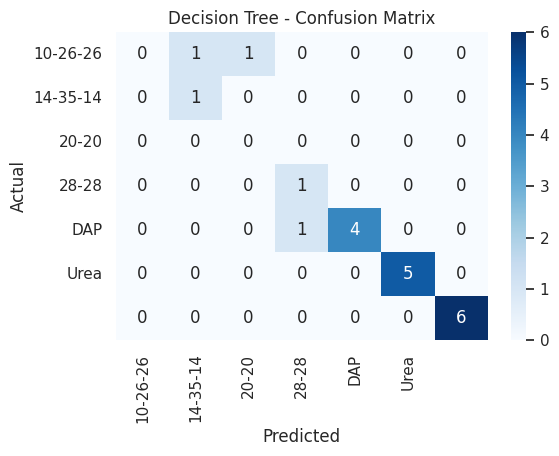

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=9)

knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

cm = confusion_matrix(y_test, y_pred)

labels = sorted(set(y_test))

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree - Confusion Matrix")
plt.show()

### Support Vector Machine

Accuracy: 100.00%


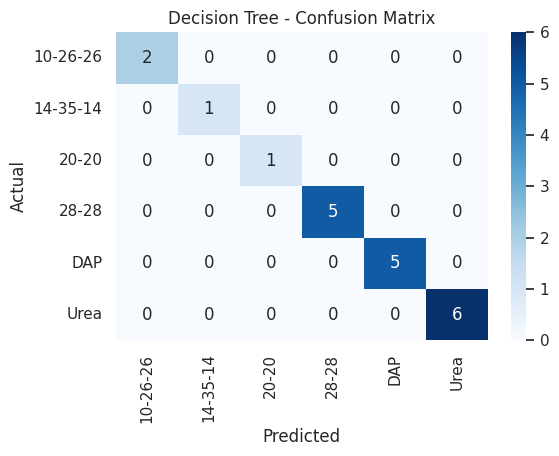

In [ ]:
svm_classifier = SVC(kernel='linear', C=1.0, random_state=25)

svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

cm = confusion_matrix(y_test, y_pred)

labels = sorted(set(y_test))

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree - Confusion Matrix")
plt.show()

Accuracy: 100.00%


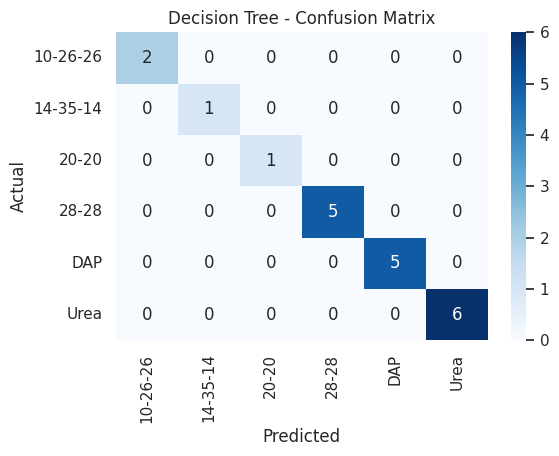

In [145]:
logistic_regression = LogisticRegression(random_state=42, max_iter=1000)

logistic_regression.fit(X_train, y_train)

y_pred = logistic_regression.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

cm = confusion_matrix(y_test, y_pred)

labels = sorted(set(y_test))

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression- Confusion Matrix")
plt.show()